## Algoritmo de treinamento de uma rede neural para classificação de níveis de amadurecimento de mamões.

### 1 - Importações

In [2]:
import matplotlib.pyplot as plt
from configs.settings import BASE_DIR
import itertools
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import Sequential
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

2024-03-23 18:32:15.655068: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:32:16.189359: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 18:32:16.189446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 18:32:16.275367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-23 18:32:16.488490: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-23 18:32:16.493803: I tensorflow/core/platform/cpu_feature_guard.cc:1

### 2 - Função para construção da matriz de confusão
Uma matriz de confusão é uma tabela usada em aprendizado de máquina e estatísticas para avaliar o desempenho de um modelo de classificação. Ela é especialmente útil quando se deseja compreender o desempenho de um algoritmo de classificação em um conjunto de dados onde as classes são conhecidas.

A matriz de confusão organiza as previsões de um modelo em relação aos valores reais das classes. Ela é geralmente representada como uma tabela bidimensional onde as linhas representam as classes reais e as colunas representam as classes previstas pelo modelo. Cada célula na matriz contém o número de instâncias de dados que foram classificadas corretamente ou incorretamente.

In [3]:
def plot_confusion_matrix(
        cm, 
        classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues
    ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

### 3 - Preparando o DATASET
O trecho de código abaixo é responsável por carregar imagens de um conjunto de dados de mamão e prepará-las para treinar um modelo de aprendizado de máquina

250 images to array
All images to array!


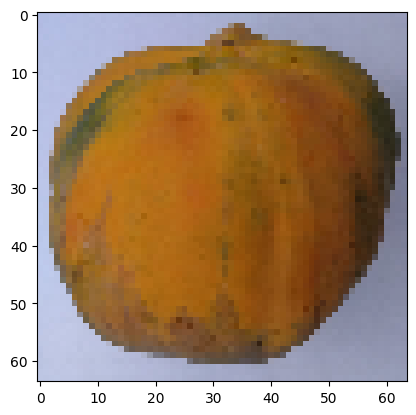

3
Train set size: 240, Test set size: 60


In [4]:
folder = os.path.join(BASE_DIR, 'papaya_dataset_/papaya_dataset_01/')

image_width = 64
image_height = 64
channels = 3

train_files = []
i=0
for estado in ['mature', 'partiallymature', 'unmature']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(estado)) if os.path.isfile(os.path.join(folder + '/' + str(estado), f))]
    for _file in onlyfiles:
        train_files.append(_file)

dataset = np.ndarray(shape=(len(train_files), image_height, image_width, channels),dtype=np.float32)
y_dataset = []

i = 0
for estado in ['mature', 'partiallymature', 'unmature']:
    onlyfiles = [f for f in os.listdir(folder + '/' + str(estado)) if os.path.isfile(os.path.join(folder + '/' + str(estado), f))]
    for _file in onlyfiles:
        ###
        img = cv2.imread(os.path.join(folder, estado, _file))
        img_resized = cv2.resize(img, (image_width, image_height))

        dataset[i] = img_resized
        mapping = {'mature': 0, 'partiallymature': 1, 'unmature': 2}
        y_dataset.append(mapping[estado])
        ###
        i += 1
        if i % 250 == 0:
            print("%d images to array" % i)
print("All images to array!")

# Normalizando os dados
dataset = dataset.astype('float32')
dataset /= 255

pixels = np.array(dataset[0], dtype='float32')
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))
plt.show()
plt.close()
n_classes = len(set(y_dataset))
print(n_classes)

y_dataset_ = to_categorical(y_dataset, n_classes)

X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset_, test_size=0.2)
print("Train set size: {0}, Test set size: {1}".format(len(X_train), len(X_test)))


### 4 - Construindo o modelo
Treinamento de um modelo de rede neural convolucional para classificação de imagens.

In [5]:
datagen = ImageDataGenerator(rotation_range=90, shear_range=0.2, horizontal_flip=True, fill_mode='nearest')

datagen.fit(X_train)

model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()



2024-03-23 18:32:40.002828: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.
2024-03-23 18:32:40.062679: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.
2024-03-23 18:32:40.091590: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 128)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 256)               31490304  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

### 5 - Compilando o modelo

In [6]:
# Taxa de aprendizado
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Parada antecipada
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'max', patience = 5)

# Treinando o modelo
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, callbacks = [early_stopping])

Epoch 1/20


2024-03-23 18:32:41.025333: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.
2024-03-23 18:32:41.044396: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 125960192 exceeds 10% of free system memory.


6/6 [==============================] - 6s 737ms/step - loss: 3.9931 - accuracy: 0.5000 - val_loss: 2.6022 - val_accuracy: 0.6458
Epoch 2/20
6/6 [==============================] - 4s 649ms/step - loss: 1.1388 - accuracy: 0.6667 - val_loss: 0.2742 - val_accuracy: 0.8958
Epoch 3/20
6/6 [==============================] - 4s 636ms/step - loss: 0.2651 - accuracy: 0.9219 - val_loss: 0.1746 - val_accuracy: 0.9167
Epoch 4/20
6/6 [==============================] - 4s 626ms/step - loss: 0.1808 - accuracy: 0.9531 - val_loss: 0.1394 - val_accuracy: 0.9167
Epoch 5/20
6/6 [==============================] - 4s 616ms/step - loss: 0.0667 - accuracy: 0.9844 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 6/20
6/6 [==============================] - 4s 616ms/step - loss: 0.0341 - accuracy: 0.9948 - val_loss: 0.0270 - val_accuracy: 1.0000


### 6 - Desenhando gráfico da função perda

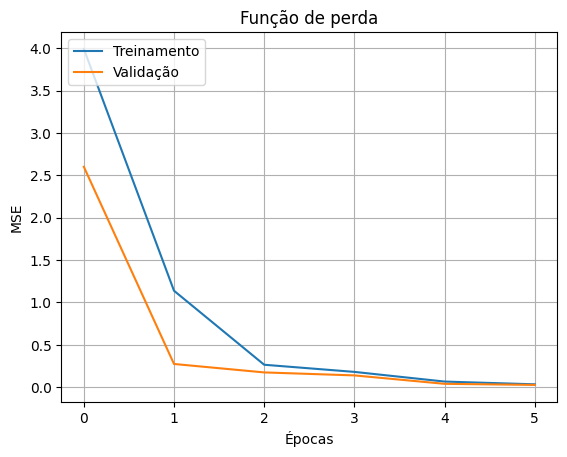

In [12]:
# Gráfico de treinamento e validação da função perda
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title("Função de perda")
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.grid(True)
plt.show()
plt.close()

### 7 - Desenhando gráfico da função de acurácia

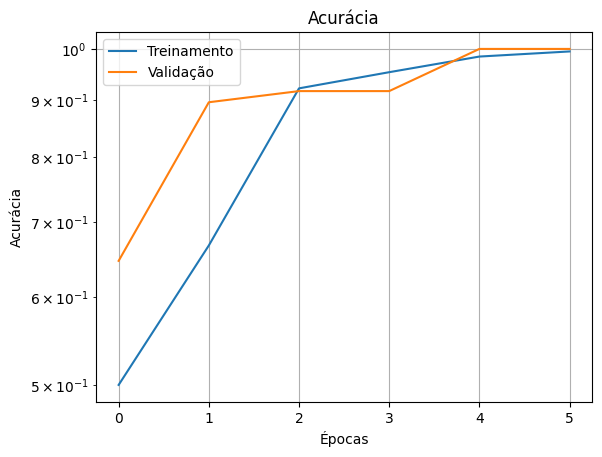

In [14]:
# Gráfico de treinamento e validação da acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.yscale("log")
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend(['Treinamento', 'Validação'], loc='upper left')
plt.grid(True)
plt.show()
plt.close()


### 8 - Resultado das predições

2/2 [==============================] - 0s 73ms/step


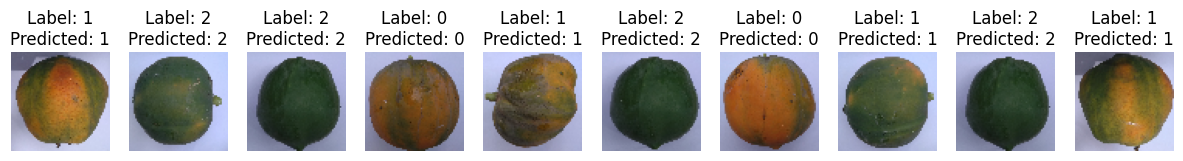

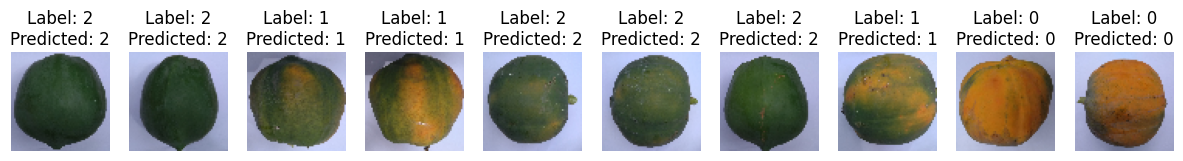

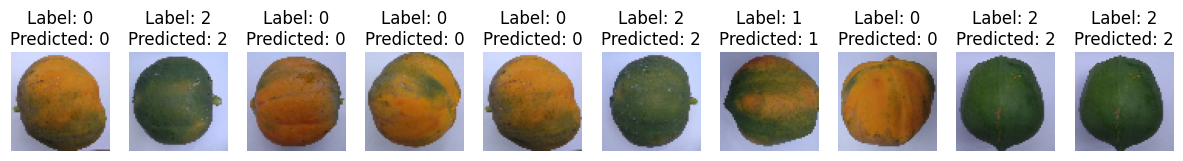

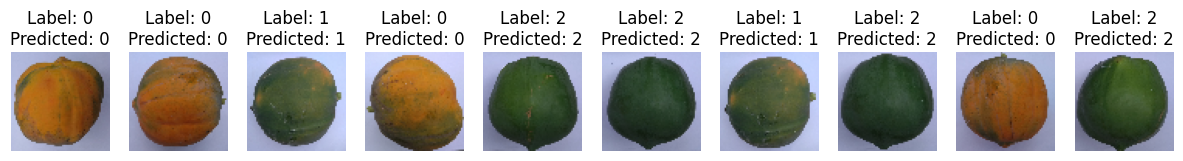

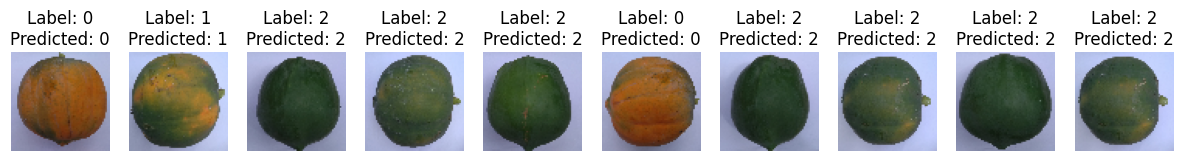

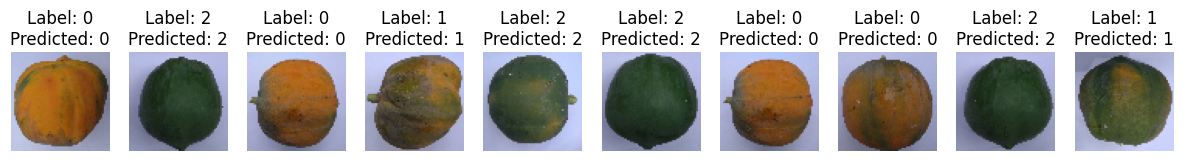

In [16]:
preds = model.predict(X_test)
        
n = 10
total_images = len(X_test)
for t in range(total_images // n):
    plt.figure(figsize=(15,15))

    for i in range(n*t, min(n*(t+1), total_images)):
        plt.subplot(1, n, i + 1 - n*t)
        plt.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB), cmap='gray')
        plt.title('Label: {}\nPredicted: {}'.format(np.argmax(y_test[i]), np.argmax(preds[i])))
        plt.axis('off')
    plt.show()
    plt.close()

### 9 - Gráfico da matriz de confusão
Uma matriz de confusão é uma tabela usada em aprendizado de máquina e estatísticas para avaliar o desempenho de um modelo de classificação. Ela é especialmente útil quando se deseja compreender o desempenho de um algoritmo de classificação em um conjunto de dados onde as classes são conhecidas.

A matriz de confusão organiza as previsões de um modelo em relação aos valores reais das classes. Ela é geralmente representada como uma tabela bidimensional onde as linhas representam as classes reais e as colunas representam as classes previstas pelo modelo. Cada célula na matriz contém o número de instâncias de dados que foram classificadas corretamente ou incorretamente.

Confusion matrix, without normalization
[[19  0  0]
 [ 0 13  0]
 [ 0  0 28]]


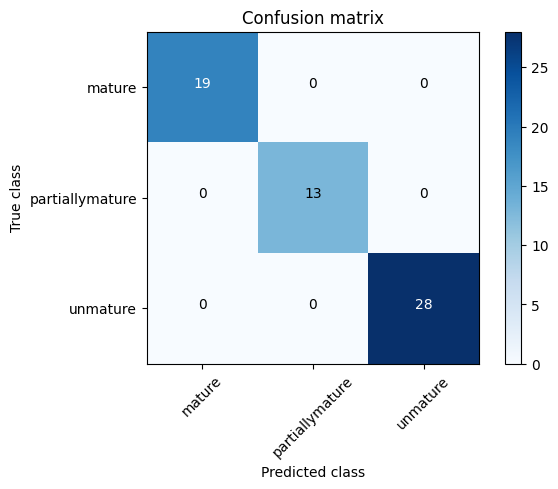

In [18]:
y_test_ = [np.argmax(x) for x in y_test]
preds_ = [np.argmax(x) for x in preds]

cm = confusion_matrix(y_test_, preds_)
plot_confusion_matrix(cm, classes=['mature', 'partiallymature', 'unmature'], title='Confusion matrix')
plt.show()
plt.close()



### 10 - Avaliando o modelo com métricas
Accuracy: Mede a proporção de predições corretas em relação ao total de predições.

Precision: Mede a proporção de verdadeiros positivos em relação ao total de predições positivas.

Recall: Mede a proporção de verdadeiros positivos em relação ao total de valores positivos reais.

F1: Combinação harmônica de precision e recall, fornecendo uma medida balanceada entre as duas métricas.

In [20]:
# Calcular acurácia
accuracy = accuracy_score(y_test_, preds_)
print("Acurácia:", accuracy*float(100.0), "%")

# Calcular precisão
precision = precision_score(y_test_, preds_, average='macro')
print("Precisão:", precision*float(100.0), "%")

# Calcular recall
recall = recall_score(y_test_, preds_, average='macro')
print("Recall:", recall*float(100.0), "%")

# Calcular F1 score
f1 = f1_score(y_test_, preds_, average='macro')
print("F1-score:", f1*float(100.0), "%")

Acurácia: 100.0 %
Precisão: 100.0 %
Recall: 100.0 %
F1-score: 100.0 %
